In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('sketchdog.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

(-0.5, 234.5, 338.5, -0.5)

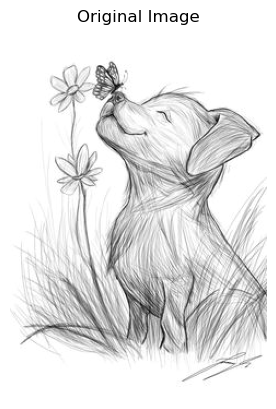

In [14]:
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

(-0.5, 234.5, 338.5, -0.5)

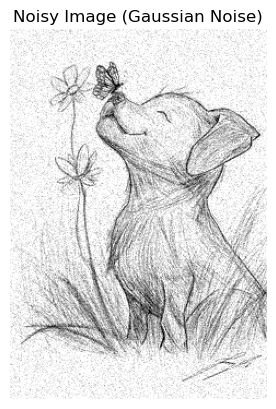

In [15]:
gaussian_noise = np.random.normal(0,25, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

(-0.5, 234.5, 338.5, -0.5)

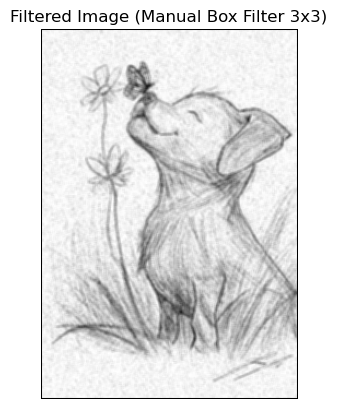

In [16]:
filtered_image = np.zeros_like(noisy_image)
height, width = noisy_image.shape
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        filtered_value = np.mean(neighborhood)
        filtered_image[i, j] = filtered_value
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Box Filter 3x3)')
plt.axis('off')

In [ ]:
Lokesh.M
212223230114

(-0.5, 234.5, 338.5, -0.5)

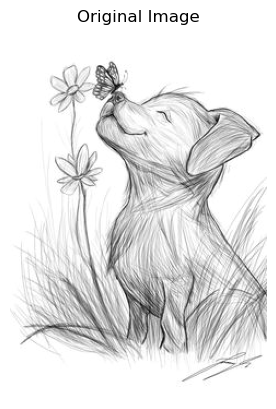

In [17]:
plt.imshow(image,cmap="gray")
plt.title('Original Image')
plt.axis('off')

(-0.5, 234.5, 338.5, -0.5)

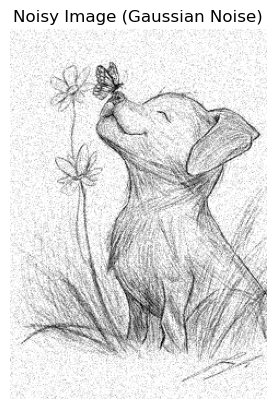

In [18]:
gaussian_noise = np.random.normal(0,25, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

(-0.5, 234.5, 338.5, -0.5)

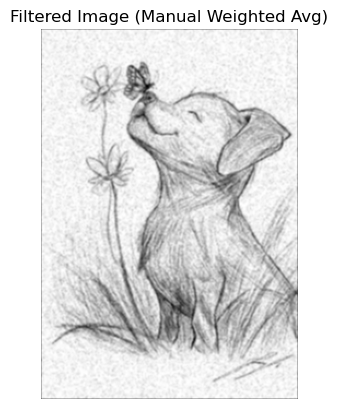

In [19]:
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0  # Normalize the kernel

image_height, image_width = noisy_image.shape
kernel_size = kernel.shape[0]  
pad = kernel_size // 2

padded_image = np.pad(noisy_image, pad, mode='constant', constant_values=0)

filtered_image = np.zeros_like(noisy_image)

for i in range(pad, image_height + pad):
    for j in range(pad, image_width + pad):
        roi = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
        filtered_value = np.sum(roi * kernel)
        filtered_image[i - pad, j - pad] = np.clip(filtered_value, 0, 255)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Weighted Avg)')
plt.axis('off')

In [ ]:
Lokesh.M
212223230114

(-0.5, 234.5, 338.5, -0.5)

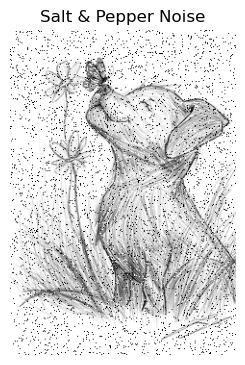

In [29]:
noisy_image = np.copy(image)
salt_prob = 0.05  
pepper_prob = 0.05  
noisy_image = np.copy(image)
num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255
num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

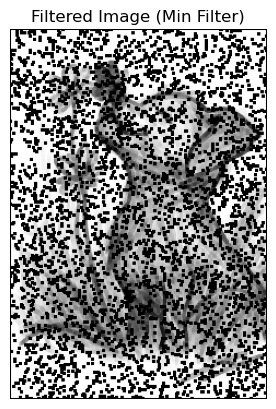

In [32]:
min_filtered_image = np.zeros_like(noisy_image)
height, width = noisy_image.shape
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        min_filtered_image[i, j] = np.min(neighborhood)

plt.imshow(min_filtered_image, cmap='gray')
plt.title('Filtered Image (Min Filter)')
plt.axis('off')
plt.show()

(-0.5, 234.5, 338.5, -0.5)

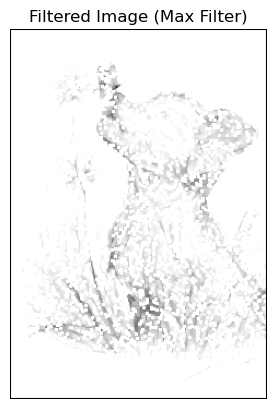

In [36]:
max_filtered_image = np.zeros_like(noisy_image)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        max_filtered_image[i, j] = np.max(neighborhood)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Filtered Image (Max Filter)')
plt.axis('off')

(-0.5, 234.5, 338.5, -0.5)

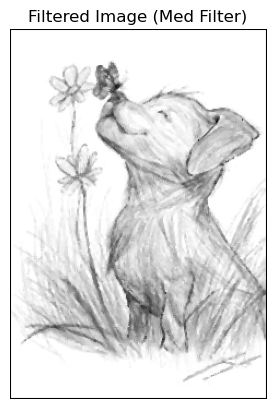

In [37]:
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        med_filtered_image[i, j] = np.median(neighborhood)
plt.imshow(med_filtered_image, cmap='gray')
plt.title('Filtered Image (Med Filter)')
plt.axis('off')

(-0.5, 234.5, 338.5, -0.5)

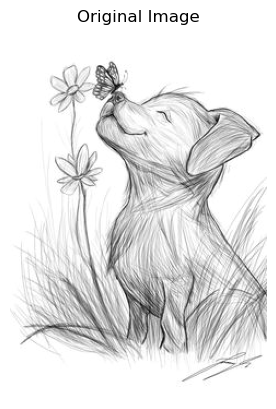

In [40]:
image = cv2.imread('sketchdog.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

In [ ]:
Lokesh.M
212223230114

(-0.5, 236.5, 340.5, -0.5)

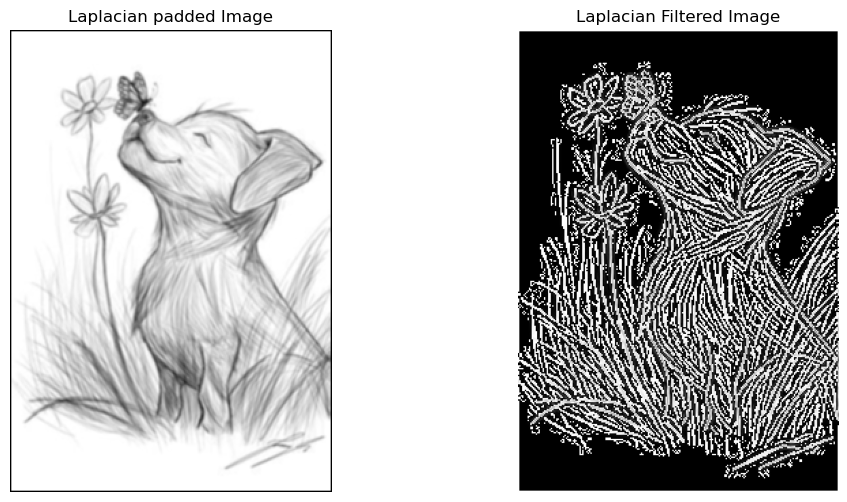

In [49]:
image = cv2.imread('sketchdog.png', cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

image_height, image_width = blurred_image.shape
kernel_height, kernel_width = laplacian_kernel.shape
pad_height = kernel_height // 2
pad_width = kernel_width // 2
padded_image = np.pad(blurred_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

laplacian_filtered_image = np.zeros_like(blurred_image)

for i in range(pad_height, image_height + pad_height):
    for j in range(pad_width, image_width + pad_width):
        region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
        laplacian_filtered_image[i - pad_height, j - pad_width] = np.sum(region * laplacian_kernel)
        
laplacian_padded_image = np.zeros_like(blurred_image)

for i in range(pad_height, image_height + pad_height):
    for j in range(pad_width, image_width + pad_width):
        region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
        laplacian_padded_image[i - pad_height, j - pad_width] = np.sum(region * laplacian_kernel)


plt.figure(figsize=(12, 6))

# Laplacian Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title("Laplacian Filtered Image")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(padded_image, cmap='gray')
plt.title("Laplacian padded Image")
plt.axis('off')


(-0.5, 234.5, 338.5, -0.5)

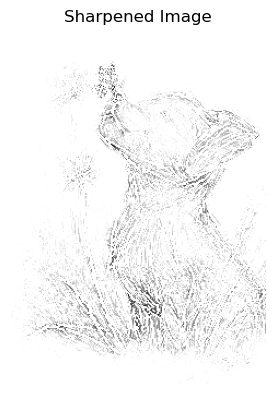

In [51]:
sharpened_image = cv2.add(image, laplacian_filtered_image)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')